In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_train.set_index('Date', inplace=True)

In [ ]:
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test.set_index('Date', inplace=True)

In [ ]:
training_set = data_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
38/38 [==============================] - 19s 135ms/step - loss: 0.0469
Epoch 2/10
38/38 [==============================] - 6s 166ms/step - loss: 0.0062
Epoch 3/10
38/38 [==============================] - 5s 137ms/step - loss: 0.0060
Epoch 4/10
38/38 [==============================] - 5s 129ms/step - loss: 0.0052
Epoch 5/10
38/38 [==============================] - 6s 164ms/step - loss: 0.0053
Epoch 6/10
38/38 [==============================] - 5s 133ms/step - loss: 0.0063
Epoch 7/10
38/38 [==============================] - 6s 167ms/step - loss: 0.0050
Epoch 8/10
38/38 [==============================] - 9s 228ms/step - loss: 0.0048
Epoch 9/10
38/38 [==============================] - 6s 166ms/step - loss: 0.0044
Epoch 10/10
38/38 [==============================] - 6s 159ms/step - loss: 0.0050


In [ ]:
real_stock_price = data_test.iloc[:, 1:2].values
dataset_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


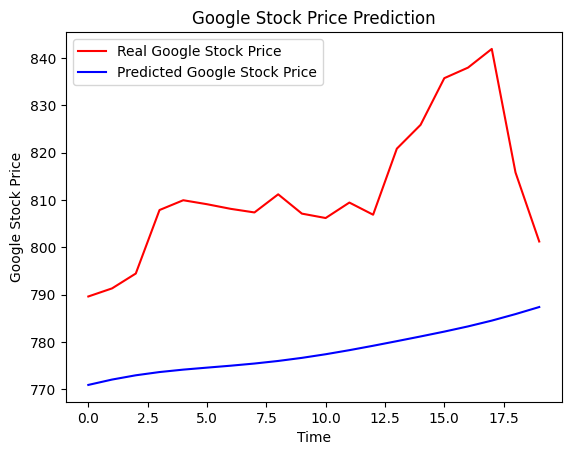

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()